# Homework 3 - Francesco Ortu

## Ex 1

1. Draw the Bayesian Network representing the joint distribution

$$P(A,B,C,D,E,F,G)=P(A)P(B|A)P(F|B)P(C|A)P(D|B)P(E|D,F)P(G).$$

![image](/home/francesco/Documents/Probabilistic_ML/statistical-machine-learning/homeworks2022/Solutions/net.png)

2. Indicate whether the following statements on (conditional) independence are True or False and motivate your answer.

 a. $A\perp \!\!\! \perp  D$ : FALSE

    D is a descendant of A
    
 
 b. $F \perp \!\!\! \perp  D$ : FALSE
 
    F and D have the same parents

 
 c. $A\perp \!\!\! \perp  B | C$ : FALSE
      $$ P(A,B | C) = \dfrac{P(A,B,C)}{P(C)} = \dfrac{P(A)P(C|A)P(B|A)}{P(C)} = P(B|A)P(A|C) \not = P(A|C)P(B|C) $$
 
 d. $A\perp \!\!\! \perp  D | B$ : TRUE
     $$ P(A,D | B) = \dfrac{P(A,D,B)}{P(B)}=\dfrac{P(A)P(B|A)P(D|B)}{P(B)}=P(A|B)P(D|B) $$
 
 e. $D\perp \!\!\! \perp  F | E$ : FALSE
 
      head to head
      
   $$ P(D,F |E) = \dfrac{P(D,F,E)}{P(E)}=\dfrac{P(D,F)P(E|F,D)}{P(E)} \not = P(D|E)P(F|E) $$

 f. $B\perp \!\!\! \perp F| E$ : FALSE
    $$ P(B,F | E) = \dfrac{P(B,F,E)}{P(E)}=\dfrac{P(B)P(F|B)P(E|F)}{P(E)} \not = P(B|E)P(F|E) $$
     

 g. $A\perp \!\!\! \perp  D | \{B, F\}$ : TRUE
  $$\begin{aligned}
  P(A,D | B,F) &= \dfrac{P(A,D,B,F) }{P(B,F)} = \dfrac{P(A)P(B|A)P(F|B)P(D|B)}{P(B)P(F|B)} 
  \\ & = P(A|B)P(D|B) = \dfrac{P(B,A)P(A) P(F|B)}{P(A)P(B)P(F|B)} \cdot P(D|B) 
  \\ & = \dfrac{ P(B|A)P(A)P(F|B)  }{ P(B)P(F|B) } \cdot \dfrac{P(D|B)P(F|B)P(B)}{P(B)P(F|B)}
  \\ & = \dfrac{ P(A,B,F) }{ P(B,F) } \cdot \dfrac{ P(D,B,F) } { P(B,F) } = P(A | B, F)P(D | B, F)
  \end{aligned}
  $$
  


## EX 2

1. Write the generative model represented by the following directed graph, knowing that:
    - $p$ and $\pi_j$ are sampled from Beta distributions;
    - $r_i$ is sampled from a Bernoulli distribution;
    - $u_{ij}$ is sampled from a Bernoulli distribution with parameter $r_i (1 - \pi_j) + (1 - r_i)\pi_j$.

![image](/home/francesco/Documents/Probabilistic_ML/statistical-machine-learning/homeworks2022/Solutions/net_bay.png)

2. Implement the generative model using `pyro`. 

    Set the hyperparameters to $\alpha_p=1,\beta_p=1,\alpha_\pi=1,\beta_\pi=5$ and evaluate your model on the observations `data = dist.Bernoulli(0.6).sample((12,6))`.

    Remember to use plate notation and to condition on the observed data!

----

The joint distribution is:
$$ P(p,r,\mu,\pi |\alpha_p, \alpha_{\pi}, \beta_p, \beta_{\pi}) = P(p|\alpha_p, \beta_p) \prod_{j=1}^N P(\pi_j | \beta_{\pi}, \alpha_{\pi}) \prod_{i=1}^S P(r_i |p) \prod_{\substack{i=1\dots N \\ j=1\dots S }} P(\mu_{ij}|r_i,p_j) $$
Given the observations, we can compute the joint distribution:
$$ P(p,r,\pi | \mu, \alpha_p, \alpha_{\pi}, \beta_p, \beta_{\pi} ) = \dfrac{P(p,r,\mu,\pi |\alpha_p, \alpha_{\pi}, \beta_p, \beta_{\pi}) }{P(\mu |\alpha_p, \alpha_{\pi}, \beta_p, \beta_{\pi})} $$

In [3]:
import pyro 
import torch
import pyro.distributions as dist

In [119]:
def model(data):
    N = data.size()[0]
    S = data.size()[1]
    #set hyperparameters
    alpha_p = 1
    beta_p = 1
    alpha_pi= 1
    beta_pi = 5

    
    p = pyro.sample('p', dist.Beta(alpha_p, beta_p))
    
    r_plate = pyro.plate('r_plate', S, dim = -1)
    pi_plate = pyro.plate("pi_plate", N, dim = -2)

    with pi_plate:
        pi = pyro.sample('pi', dist.Beta(alpha_pi, beta_pi))

    with r_plate:
        r = pyro.sample('r', dist.Bernoulli(probs=p))
    
    with   pi_plate, r_plate:
        u = pyro.sample( "u", dist.Bernoulli( r * ( 1 - pi) + ( 1 - r ) * pi), obs=data )
        
    return p, r,pi,u

tensor(0.6268) tensor([1., 1., 0., 0., 1., 1.]) tensor([[0.1436],
        [0.0748],
        [0.0337],
        [0.0497],
        [0.0330],
        [0.2033],
        [0.0222],
        [0.0875],
        [0.1386],
        [0.0146],
        [0.0477],
        [0.2430]]) tensor([[0., 0., 0., 1., 0., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 1.],
        [0., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 1.]])


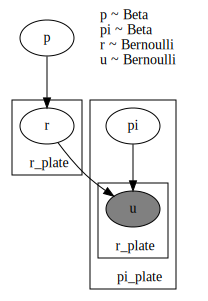

In [120]:
data = dist.Bernoulli(0.6).sample((12,6))

p,r,pi ,u = model(data)

print(p,r,pi,u)

pyro.render_model(model, model_args=(data,),render_distributions=True) #plates that are overlapped are rendered as two separate plates
